In [1]:
import os

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [2]:
path = "output - csv/"

In [3]:
files = pd.Series(os.listdir(path))

In [4]:
files

0      out_cenario1_tweets_en_120.csv
1      out_cenario1_tweets_en_306.csv
2      out_cenario1_tweets_en_193.csv
3      out_cenario1_tweets_en_361.csv
4      out_cenario1_tweets_en_254.csv
                    ...              
396    out_cenario1_tweets_en_304.csv
397    out_cenario1_tweets_en_167.csv
398    out_cenario1_tweets_en_199.csv
399    out_cenario1_tweets_en_293.csv
400     out_cenario1_tweets_en_23.csv
Length: 401, dtype: object

In [5]:
files_csv = files[files.str.match(r'(out)\S+') == True]
files_csv.reset_index(drop=True, inplace=True)

In [6]:
sorted(files_csv)

['out_cenario1_tweets_en_1.csv',
 'out_cenario1_tweets_en_10.csv',
 'out_cenario1_tweets_en_100.csv',
 'out_cenario1_tweets_en_101.csv',
 'out_cenario1_tweets_en_102.csv',
 'out_cenario1_tweets_en_103.csv',
 'out_cenario1_tweets_en_104.csv',
 'out_cenario1_tweets_en_105.csv',
 'out_cenario1_tweets_en_106.csv',
 'out_cenario1_tweets_en_107.csv',
 'out_cenario1_tweets_en_108.csv',
 'out_cenario1_tweets_en_109.csv',
 'out_cenario1_tweets_en_11.csv',
 'out_cenario1_tweets_en_110.csv',
 'out_cenario1_tweets_en_111.csv',
 'out_cenario1_tweets_en_112.csv',
 'out_cenario1_tweets_en_113.csv',
 'out_cenario1_tweets_en_114.csv',
 'out_cenario1_tweets_en_115.csv',
 'out_cenario1_tweets_en_116.csv',
 'out_cenario1_tweets_en_117.csv',
 'out_cenario1_tweets_en_118.csv',
 'out_cenario1_tweets_en_119.csv',
 'out_cenario1_tweets_en_12.csv',
 'out_cenario1_tweets_en_120.csv',
 'out_cenario1_tweets_en_121.csv',
 'out_cenario1_tweets_en_122.csv',
 'out_cenario1_tweets_en_123.csv',
 'out_cenario1_tweets_en_

In [7]:
columns = ['text', 'afinn', 'happinessindex', 'opinionlexicon', 'sentiment140', 'opinionfinder',
           'sentistrength', 'sasa', 'vader', 'umigon', 'emoticons', 'emoticonds', 'emolex',
           'stanford', 'panas', 'socal', 'sann', 'sentiwordnet', 'nrchashtag']

In [8]:
df = pd.read_csv(path + sorted(files_csv)[0], sep="\t")
df.reset_index(inplace=True)
df.columns = columns
df.head(5)

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag
0,essential reading working data intensive resea...,-1,1,-1,1,-1,-1,0,0,0,0,1,1,-1,0,1,0,-1,-1
1,women amazing months pregnant still idea mothe...,1,1,1,1,1,1,-1,1,1,0,1,1,1,0,1,0,1,1
2,weekend got show got music amp,0,1,0,-1,0,0,0,0,0,0,1,1,1,0,0,0,1,1
3,centre members yvonne hora boer tan eliza rokh...,0,0,1,1,0,0,0,0,0,0,1,1,-1,0,1,0,1,1
4,happy international women day afl players disc...,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,-1


In [9]:
df.tail(5)

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag
995,give support women football year,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,-1,-1
996,join mater fun run far raised crack,1,1,0,1,0,1,0,1,1,0,1,1,-1,0,1,0,1,-1
997,take international womens day seriously hooter...,0,0,0,1,-1,0,0,0,0,0,1,0,1,0,0,0,-1,1
998,like give big shout incredible women ladies gi...,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,-1
999,happy international working women day lieu fir...,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1


In [10]:
for f in tqdm(range(1, len(files_csv))):
    df2 = pd.read_csv(path + sorted(files_csv)[f], sep="\t")
    df2.reset_index(inplace=True)
    df2.columns = columns
    df = df.append(df2, ignore_index=True)

In [11]:
df.shape

(400156, 19)

In [12]:
df.head()

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag
0,essential reading working data intensive resea...,-1,1,-1,1,-1,-1,0,0,0,0,1,1,-1,0,1,0,-1,-1
1,women amazing months pregnant still idea mothe...,1,1,1,1,1,1,-1,1,1,0,1,1,1,0,1,0,1,1
2,weekend got show got music amp,0,1,0,-1,0,0,0,0,0,0,1,1,1,0,0,0,1,1
3,centre members yvonne hora boer tan eliza rokh...,0,0,1,1,0,0,0,0,0,0,1,1,-1,0,1,0,1,1
4,happy international women day afl players disc...,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,-1


In [13]:
from statistics import mode

def define_sentiment(row):
    try:
        result = mode(row)
    except ValueError:
        result = "indefinido"
    return result

In [14]:
df["result"] = df.iloc[:,1:].apply(define_sentiment, axis=1)

In [15]:
df[df["result"] == 0]

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag,result
2,weekend got show got music amp,0,1,0,-1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0
3,centre members yvonne hora boer tan eliza rokh...,0,0,1,1,0,0,0,0,0,0,1,1,-1,0,1,0,1,1,0
8,aurat march inside story khalil rehman marvi f...,-1,-1,0,0,0,-1,0,0,0,0,1,0,0,0,0,0,-1,0,0
13,according boards governing bodies female direc...,0,0,0,1,0,0,0,0,0,0,1,1,-1,0,0,0,1,1,0
17,first entry fee women monuments,0,0,0,1,0,0,-1,0,0,0,1,-1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400140,take look research benefiting patients funded ...,0,1,0,0,0,0,1,0,0,0,1,0,-1,0,0,0,1,-1,0
400141,read structural engineer roma agrawal feature,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
400148,created list movies watch check,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
400150,trending song,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
df[df["result"] == 1]

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag,result
1,women amazing months pregnant still idea mothe...,1,1,1,1,1,1,-1,1,1,0,1,1,1,0,1,0,1,1,1
4,happy international women day afl players disc...,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,-1,1
5,strong women may know may may raise happy inte...,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,-1,1
6,happy everyone marching campaigning inclusion ...,1,1,1,1,0,0,1,1,1,0,1,1,-1,1,1,0,1,1,1
7,today celebrate incredible women behind custom...,1,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400149,thanks friend fitting tribute betty campbell,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1
400151,tagging better half brought joy ever thought p...,1,1,1,1,1,1,1,1,-1,0,1,1,1,0,1,0,1,1,1
400152,principle fosters amp women empowerment ensure...,1,1,1,1,-1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
400153,happy international women day today celebrate ...,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1


In [17]:
df[df["result"] == -1]

,text,afinn,happinessindex,opinionlexicon,sentiment140,opinionfinder,sentistrength,sasa,vader,umigon,emoticons,emoticonds,emolex,stanford,panas,socal,sann,sentiwordnet,nrchashtag,result
0,essential reading working data intensive resea...,-1,1,-1,1,-1,-1,0,0,0,0,1,1,-1,0,1,0,-1,-1,-1
19,equal rights equal opportunities women rights ...,-1,-1,-1,-1,-1,-1,-1,0,-1,0,1,-1,-1,0,-1,0,-1,-1,-1
40,years years still seeing damn fabric,-1,1,-1,-1,-1,-1,-1,0,-1,0,1,-1,0,0,0,0,-1,0,-1
41,women population poor single parents work prod...,-1,1,0,-1,0,-1,0,-1,0,0,1,1,-1,0,-1,0,-1,-1,-1
48,ahahahahahahahaha people really acutely uncomf...,0,1,0,-1,-1,-1,1,0,1,0,1,-1,-1,0,-1,0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400071,celebrating together women come time need awar...,1,1,-1,1,-1,-1,-1,0,-1,0,1,0,-1,0,-1,0,1,-1,-1
400104,pay richest tributes baloch mothers sister who...,-1,-1,-1,1,-1,-1,0,0,1,0,1,-1,-1,0,-1,0,1,-1,-1
400126,way honour international womens day goddess pr...,-1,-1,-1,-1,-1,-1,-1,0,-1,0,1,-1,-1,0,-1,0,-1,-1,-1
400129,sarla bhatt abducted raped killed fired islamists,-1,0,-1,-1,0,-1,-1,-1,-1,0,1,0,-1,0,0,0,0,-1,-1


In [18]:
polarity_df = df[['text', 'result']]

In [19]:
polarity_df

,text,result
0,essential reading working data intensive resea...,-1
1,women amazing months pregnant still idea mothe...,1
2,weekend got show got music amp,0
3,centre members yvonne hora boer tan eliza rokh...,0
4,happy international women day afl players disc...,1
...,...,...
400151,tagging better half brought joy ever thought p...,1
400152,principle fosters amp women empowerment ensure...,1
400153,happy international women day today celebrate ...,1
400154,want hear voice reading anne sexton sure,0


In [20]:
polarities = polarity_df['result'].value_counts().rename_axis(
    'polarity').reset_index(name='count')

In [21]:
polarities.loc[polarities['polarity'] == 1, 'polarity']  = 'positivo'
polarities.loc[polarities['polarity'] == 0, 'polarity'] = 'neutro'
polarities.loc[polarities['polarity'] == -1, 'polarity']  = 'negativo'

In [22]:
polarities

,polarity,count
0,positivo,251021
1,neutro,110846
2,negativo,23716
3,indefinido,14573


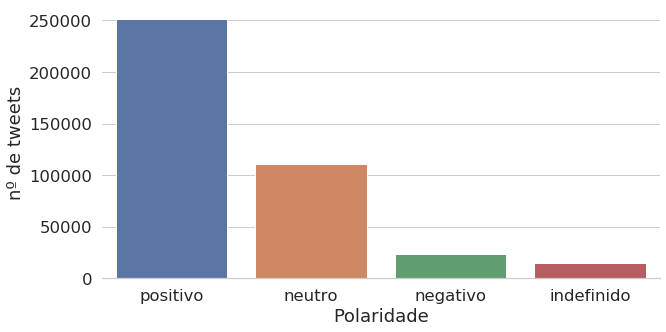

In [23]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.barplot(data=polarities, x='polarity', y='count')
sns.despine(left=True)
ax.set_ylabel('nº de tweets')
ax.set_xlabel('Polaridade')
plt.show()

In [24]:
df.to_csv('sentiment_analysis_en.csv')